In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot  as plt
import seaborn as sns


In [6]:
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [23]:
# independent feature
x=df.iloc[:,:-1]
x


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [24]:
df.replace({"Iris-setosa": 0, "Iris-virginica": 1, "Iris-versicolor": 2}, inplace=True)


In [25]:
# Target Varible
y = df['Species']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: Species, Length: 150, dtype: int64

In [28]:
## train test split

from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [29]:
x_train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,23,4.6,3.6,1.0,0.2
15,16,5.7,4.4,1.5,0.4
65,66,6.7,3.1,4.4,1.4
11,12,4.8,3.4,1.6,0.2
42,43,4.4,3.2,1.3,0.2
...,...,...,...,...,...
71,72,6.1,2.8,4.0,1.3
106,107,4.9,2.5,4.5,1.7
14,15,5.8,4.0,1.2,0.2
92,93,5.8,2.6,4.0,1.2


In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
treemodel=DecisionTreeClassifier()

In [33]:
treemodel.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.4, 0.8333333333333334, 'x[4] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 39, 41]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[0] <= 100.5\ngini = 0.5\nsamples = 80\nvalue = [0, 39, 41]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 41\nvalue = [0, 0, 41]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 39\nvalue = [0, 39, 0]')]

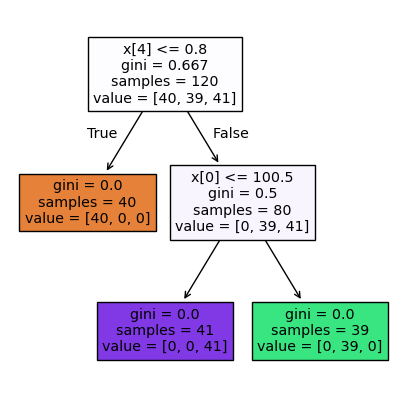

In [38]:
from sklearn import tree 
plt.figure(figsize=(5,5))
tree.plot_tree(treemodel,filled=True)

In [53]:
# predication
y_pred=treemodel.predict(x_test)


In [54]:
y_pred

array([2, 0, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0])

In [47]:
from sklearn.metrics import accuracy_score,classification_report


In [60]:
score = treemodel.score(x_test, y_test)  # Now score is defined
print(score)

1.0


In [61]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

